In [25]:
import pandas as pd
import numpy as np
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

In [26]:
#twitter API creds
consumerKey='rAoeRCnvJYyAstBcm9moZvV3v'
consumerSecret='px0Ghw43YqGFMEvOUVvF8oeGplGjU6916rEPdpb4RbJq6N9Bf5'
accessToken='915983821253877760-43AJq1nIwOVxsu1Iy5L83dvzfjhE3td'
accessTokenSecret = '3uJz05BRdto9HcXN25pokl4giy9CMPmPetqAEl89mMeKn'

In [27]:
#create Auth obj
authenticate = tweepy.OAuthHandler(consumerKey,consumerSecret)

#set the access token 
authenticate.set_access_token(accessToken , accessTokenSecret)

#Create API object
api = tweepy.API(authenticate, wait_on_rate_limit=True)


In [28]:
#Extract tweets(100) from twitter user(Bill Gates)

Name = input("Enter name: ")
posts =api.user_timeline(screen_name=Name, count=100, language="en", tweet_mode = "extended")

#print 5 tweets 
print("show 5 recent tweets: \n")
i = 1 #for the no. of tweets
for tweet in posts[0:5]:
    print(str(i) + ')' + tweet.full_text + '\n')
    i+=1

Enter name: elonmusk
show 5 recent tweets: 

1)@Erdayastronaut @Tesla Absolutely

2)@Erdayastronaut @Tesla Tesla is building up collision repair capability to help address the grief that you went through, but usually insurance companies make you go their “approved” collision repair partners. Tesla Insurance will make it smooth sailing.

3)@vincent13031925 For now. Costs are decreasing rapidly.

4)Love this beautiful shot

5)@agnostoxxx @CathieDWood @ARKInvest Trust the shrub



In [29]:
#create a dataframe column called tweets

df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

#1st 5 data
df.head()

,Tweets
0,@Erdayastronaut @Tesla Absolutely
1,@Erdayastronaut @Tesla Tesla is building up co...
2,@vincent13031925 For now. Costs are decreasing...
3,Love this beautiful shot
4,@agnostoxxx @CathieDWood @ARKInvest Trust the ...


In [30]:
#cleaning

#create clean function
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '',str(text))#using regular expression cleaning data r=raw string removed @mentions and replace with empty String
    text = re.sub(r'#','',str(text)) # removing "#" signs
    text = re.sub(r'RT[\s]+','',str(text))#removing retweets
    text = re.sub(r'https?:\/\/\S+', '',str(text))#removing URL
    return text
#cleaning Text
df['Tweets']=df['Tweets'].apply(cleanTxt)

#Show clean text
df

,Tweets
0,Absolutely
1,Tesla is building up collision repair capabi...
2,For now. Costs are decreasing rapidly.
3,Love this beautiful shot
4,Trust the shrub
...,...
95,"This a good path, but I recommend aiming for ..."
96,Urgent need to build more housing in greater A...
97,Austin++
98,No it doesn’t hurt at all 🩸


In [31]:
#create func to get subjectivity

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#create func to get polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#create 2 columns subjectivity,polarity

df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

#show new df with new columns
df

,Tweets,Subjectivity,Polarity
0,Absolutely,0.900000,0.200000
1,Tesla is building up collision repair capabi...,0.316667,-0.216667
2,For now. Costs are decreasing rapidly.,0.000000,0.000000
3,Love this beautiful shot,0.800000,0.675000
4,Trust the shrub,0.000000,0.000000
...,...,...,...
95,"This a good path, but I recommend aiming for ...",0.575000,0.525000
96,Urgent need to build more housing in greater A...,0.500000,0.562500
97,Austin++,0.000000,0.000000
98,No it doesn’t hurt at all 🩸,0.000000,0.000000


<class 'str'>


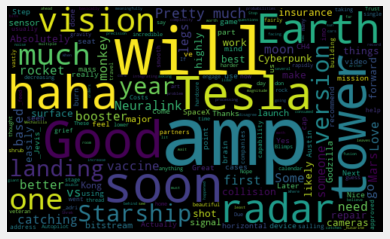

In [32]:
#plotting word cloud
allWords = ' '.join([twts for twts in df['Tweets']])
print(type(allWords))
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [33]:
#Create a func to compute the Negative , Neutral and positive analysis
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)

#show df

df

,Tweets,Subjectivity,Polarity,Analysis
0,Absolutely,0.900000,0.200000,Positive
1,Tesla is building up collision repair capabi...,0.316667,-0.216667,Negative
2,For now. Costs are decreasing rapidly.,0.000000,0.000000,Neutral
3,Love this beautiful shot,0.800000,0.675000,Positive
4,Trust the shrub,0.000000,0.000000,Neutral
...,...,...,...,...
95,"This a good path, but I recommend aiming for ...",0.575000,0.525000,Positive
96,Urgent need to build more housing in greater A...,0.500000,0.562500,Positive
97,Austin++,0.000000,0.000000,Neutral
98,No it doesn’t hurt at all 🩸,0.000000,0.000000,Neutral


In [34]:
# print all of the positive tweets

j = 1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
    if sortedDF['Analysis'][i] == 'Positive':
        print(str(j) + ')' + sortedDF['Tweets'][i])
        print()
        j += 1

1)  Absolutely

2)Love this beautiful shot

3)The art In Cyberpunk is incredible

4)  Nope haha

5)  That rocket is a hardcore veteran of many missions

6)_feed Due to lower gravity, you can travel from surface of Mars to surface of Earth fairly easily with a single stage rocket. Earth to Mars is vastly harder.

7) Good thread

8) Pretty much

9)_adri  These things are best thought of as probabilities. There are 5 forward-facing cameras. It is highly likely that at least one of them will see multiple cars ahead.

10) Sensors are a bitstream and cameras have several orders of magnitude more bits/sec than radar (or lidar). 

Radar must meaningfully increase signal/noise of bitstream to be worth complexity of integrating it. 

As vision processing gets better, it just leaves radar far behind.

11) When radar and vision disagree, which one do you believe? Vision has much more precision, so better to double down on vision than do sensor fusion.

12) This is a major problem!

13)Kong vs Godz

In [35]:
#print Negative Tweets
j = 1
sortedDF = df.sort_values(by=['Polarity'], ascending=False)
for i in range(0,sortedDF.shape[0]):
    if sortedDF['Analysis'][i] == 'Negative':
        print(str(j)+ ')' + sortedDF['Tweets'][i])
        print()
        j += 1

1)  Tesla is building up collision repair capability to help address the grief that you went through, but usually insurance companies make you go their “approved” collision repair partners. Tesla Insurance will make it smooth sailing.

2) Congrats to NIO. That is a tough milestone.

3) Almost ready with FSD Beta V9.0. Step change improvement is massive, especially for weird corner cases &amp; bad weather. Pure vision, no radar.

4)A monkey is literally playing a video game telepathically using a brain chip!!

5)Monkey plays Pong with his mind 

6)  Coming soon. Crazy number of launches this year!

7)The Earth is not flat, it’s a hollow globe &amp; Donkey King lives there!

8)  I recommend propulsive landing, as that is extensible to planets, moons &amp; asteroids. Wings &amp; runways are limited to Earth.

9)  For practical purposes, there is no limit. It will just get increasingly difficult to service.



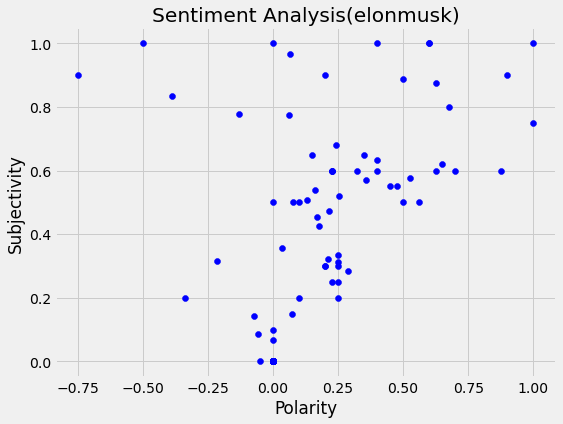

In [36]:
#plot polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Blue')

plt.title("Sentiment Analysis"+ "(" + Name + ')')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [37]:
#get % of positive tweets

ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']


percentage = round((ptweets.shape[0] / df.shape[0]) * 100,1)
percentage

52.0

In [38]:
#get % of negative tweets

ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']


percentage1 = round((ntweets.shape[0] / df.shape[0]) * 100,1)
percentage1

9.0

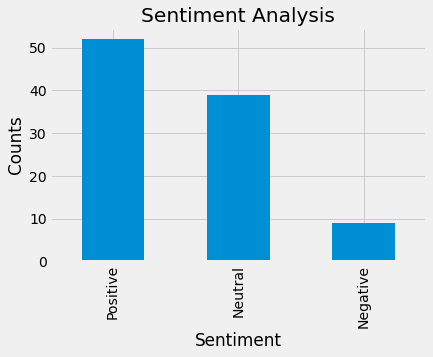

In [39]:
#show the value count
df['Analysis'].value_counts()

#plot and viz the counts

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()